In [1]:
import torch

In [2]:
import torch.nn.functional as F

In [3]:
import matplotlib.pyplot as plt

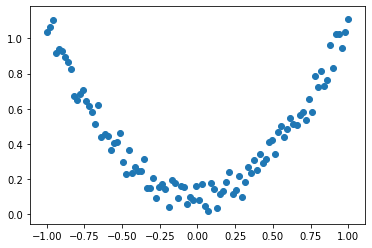

In [4]:
#生成数据集xy
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size())                 # noisy y data (tensor), shape=(100, 1)

# 画图
plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()

In [5]:
#继承torch.nn.Module来设计网络
class Net(torch.nn.Module):  # 继承 torch 的 Module
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()     # 继承 __init__ 功能
        # 定义每层用什么样的形式
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # 隐藏层线性输出
        self.predict = torch.nn.Linear(n_hidden, n_output)   # 输出层线性输出

    def forward(self, x):   # 这同时也是 Module 中的 forward 功能
        # 正向传播输入值, 神经网络分析出输出值
        x = F.relu(self.hidden(x))      # 激励函数(隐藏层的线性值)
        x = self.predict(x)             # 输出值
        return x

In [6]:
net=Net(n_feature=1,n_hidden=10,n_output=1)

In [7]:
print(net)

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


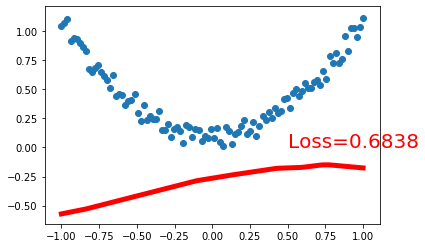

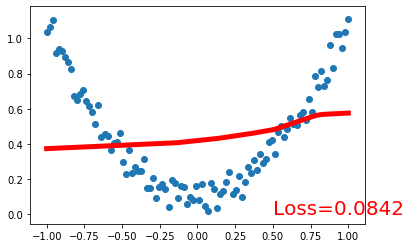

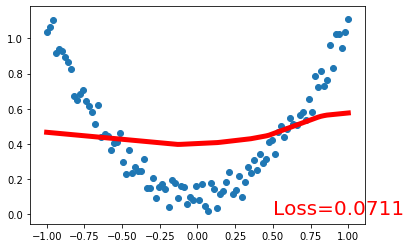

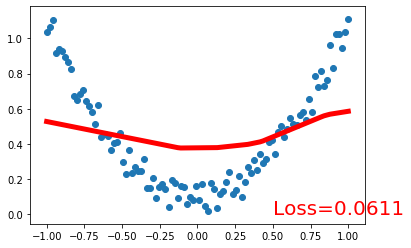

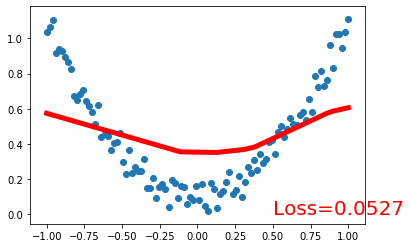

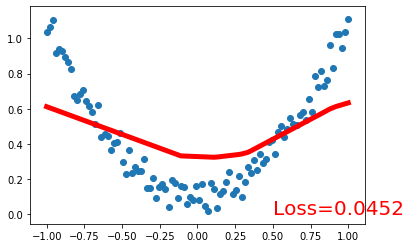

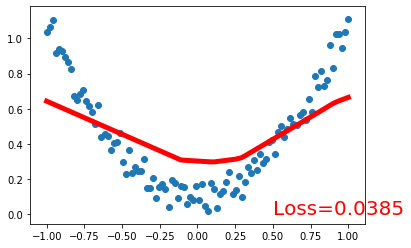

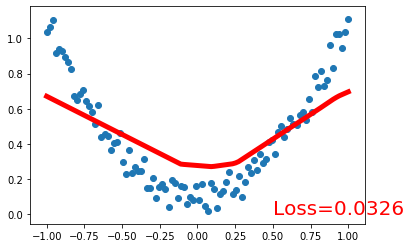

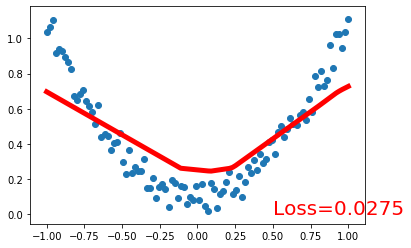

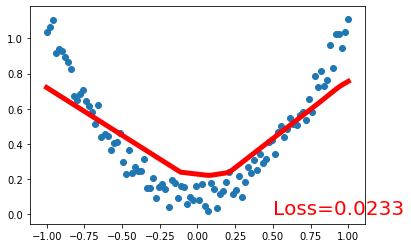

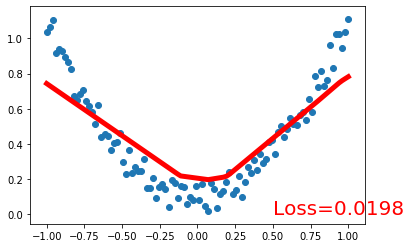

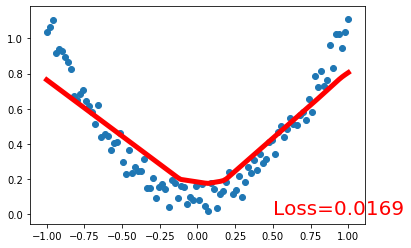

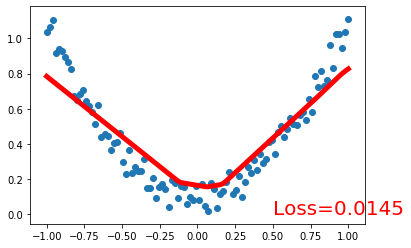

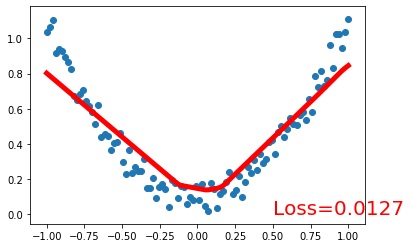

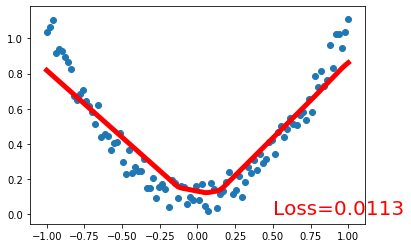

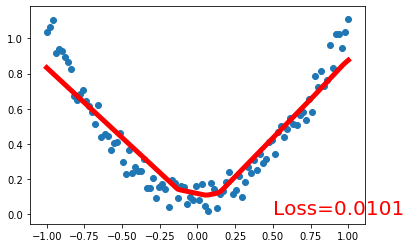

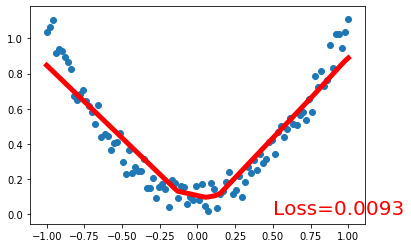

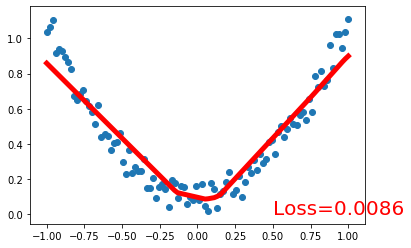

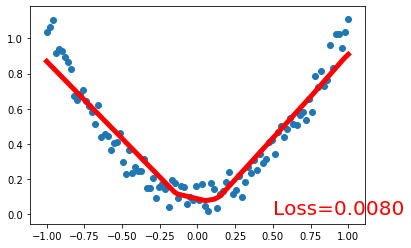

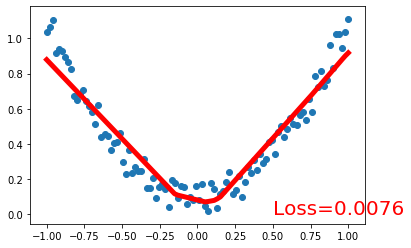

In [10]:
#训练
optimizer = torch.optim.SGD(net.parameters(), lr=0.2)  # 传入 net 的所有参数, 学习率 这里有Adam等其他优化器
loss_func = torch.nn.MSELoss()      # 预测值和真实值的误差计算公式 (均方差)

for t in range(100):
    prediction = net(x)     # 喂给 net 训练数据 x, 输出预测值

    loss = loss_func(prediction, y)     # 计算两者的误差

    optimizer.zero_grad()   # 清空上一步的残余更新参数值
    loss.backward()         # 误差反向传播, 计算参数更新值
    optimizer.step()        # 将参数更新值施加到 net 的 parameters 上
    if t % 5 == 0:
        # plot and show learning process
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)

In [11]:
net2 = torch.nn.Sequential(#快速搭建的方式
    torch.nn.Linear(1, 10),
    torch.nn.ReLU(),
    torch.nn.Linear(10, 1)
)

In [12]:
net2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [13]:
torch.save(net,'net.pkl')

/Users/vdk/opt/anaconda3/lib/python3.7/site-packages/torch/serialization.py:360: UserWarning: Couldn't retrieve source code for container of type Net. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [14]:
import torch.utils.data as Data

In [15]:
torch.manual_seed(1)    # reproducible

In [24]:
#dataloader批训练
BATCH_SIZE = 8      # 批训练的数据个数

x = torch.linspace(1, 10, 10)       # x data (torch tensor)
y = torch.linspace(10, 1, 10)       # y data (torch tensor)

# 先转换成 torch 能识别的 Dataset
#torch_dataset = Data.TensorDataset(data_tensor=x, target_tensor=y)
torch_dataset = Data.TensorDataset(x, y)

# 把 dataset 放入 DataLoader
loader = Data.DataLoader(
    dataset=torch_dataset,      # torch TensorDataset format
    batch_size=BATCH_SIZE,      # mini batch size
    shuffle=True,               # 要不要打乱数据 (打乱比较好)
    num_workers=2,              # 多线程来读数据
)

for epoch in range(3):   # 训练所有!整套!数据 3 次
    for step, (batch_x, batch_y) in enumerate(loader):  # 每一步 loader 释放一小批数据用来学习
        # 假设这里就是你训练的地方...

        # 打出来一些数据
        print('Epoch: ', epoch, '| Step: ', step, '| batch x: ',
              batch_x.numpy(), '| batch y: ', batch_y.numpy())


Epoch:  0 | Step:  0 | batch x:  [ 4. 10.  9.  8.  7.  6.  1.  2.] | batch y:  [ 7.  1.  2.  3.  4.  5. 10.  9.]
Epoch:  0 | Step:  1 | batch x:  [5. 3.] | batch y:  [6. 8.]
Epoch:  1 | Step:  0 | batch x:  [9. 8. 4. 6. 5. 3. 7. 2.] | batch y:  [2. 3. 7. 5. 6. 8. 4. 9.]
Epoch:  1 | Step:  1 | batch x:  [10.  1.] | batch y:  [ 1. 10.]
Epoch:  2 | Step:  0 | batch x:  [ 5.  1.  3.  7.  6. 10.  9.  8.] | batch y:  [ 6. 10.  8.  4.  5.  1.  2.  3.]
Epoch:  2 | Step:  1 | batch x:  [2. 4.] | batch y:  [9. 7.]
